### Import python libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

### Assign variable to imported csv files 

In [21]:
orl_tmaxdf = pd.read_csv("tmax_orlando.csv")

orl_rhumdf = pd.read_csv("rmin_orlando.csv")

#print(orl_tmaxdf)

## Make array for yrs, max temps, relative humidity, days of year

In [22]:
#pull out yr vector for Orl
#same num of yrs for both rhum and tmax

orlyrs = np.array(orl_tmaxdf.Years)

#pull out the rest of the data for Orl
orltmax = np.array(orl_tmaxdf.iloc[:,1:]) #all of x, all of y skip yrs

#rel hum
orlrhum = np.array(orl_rhumdf.iloc[:,1:])

#day of year vector
orldoy = np.arange(1, 366+1) #day one until day 336


#create a storage variable for our annual mean Tmax values

orltmax_mean_allyrs = np.zeros((orlyrs.size)) #storage variable of zeros the size of yrs

for i_orlyrs in enumerate(orlyrs):
    
    #location of all data
    loc_orlyrs = i_orlyrs[0] #do it for every yr starting at the 1st
    
    #pull out temp data for the current yr
    orltmax_orlyrs = orltmax[loc_orlyrs,:]
    
    
    #calc the mean
    orltmax_mean = np.nanmean(orltmax_orlyrs)
    
    #store the current yr estimate in our full array
    orltmax_mean_allyrs[loc_orlyrs] = orltmax_mean

# Overview of seasonality

## Plot Orlando mean maximum temperature

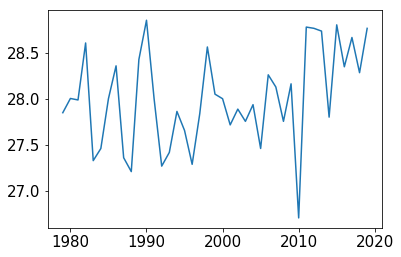

In [23]:
plt.plot(orlyrs,orltmax_mean_allyrs) #draw trend lines

## Orlando median tmax temps

(366,)


Text(0.5, 1.0, 'Orlando Daily Median Maximum Temperature')

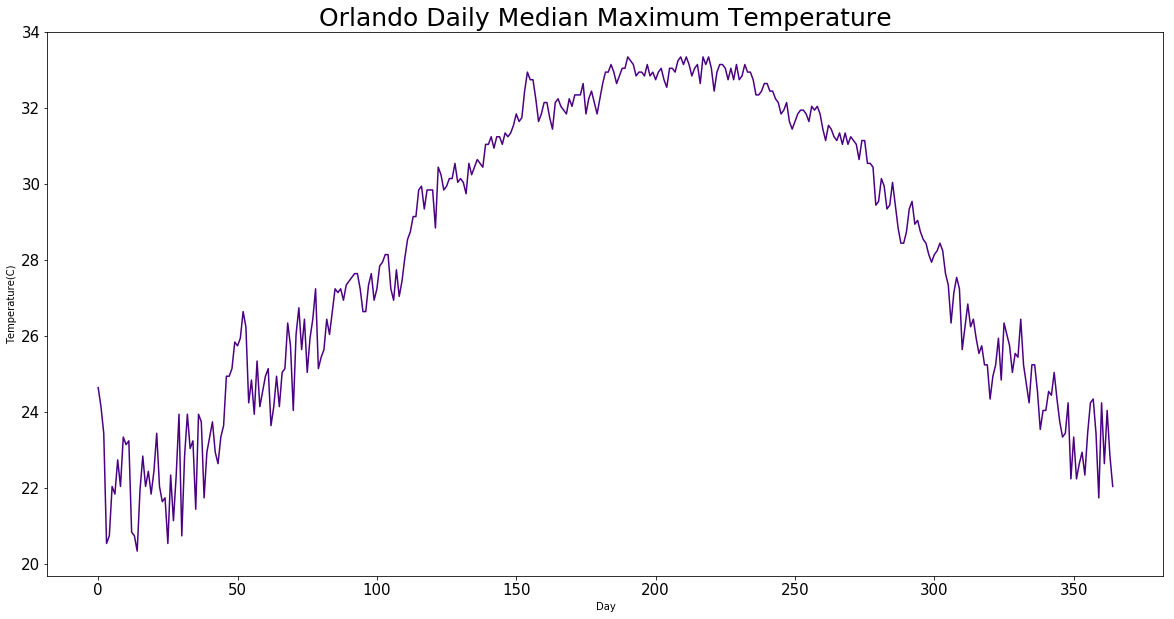

In [24]:
plt.figure(figsize=(20,10))

orltmax_median= np.median(orltmax,axis=0)

plt.plot(orltmax_median, color= 'indigo', label= 'Maximum Temperature')
#plt.figtext(.52,.9,'Orlando Daily Median Maximum Temperature', fontsize=25, ha='center')
print((np.median(orltmax,axis=0)).shape)

plt.xlabel('Day')
plt.ylabel('Temperature(C)')
plt.title('Orlando Daily Median Maximum Temperature', size=25)

## Orlando rhum temps

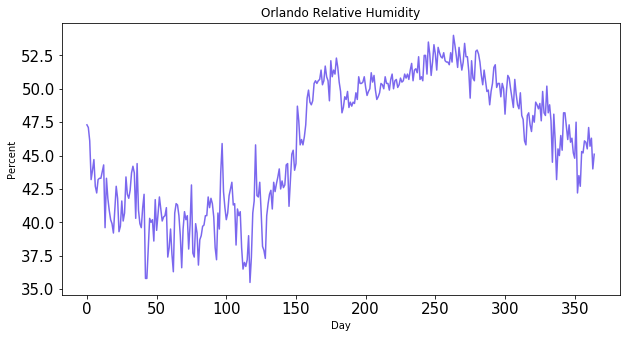

In [25]:
plt.figure(figsize=(10,5))

orlrhum_median = np.median(orlrhum,axis=0)

plt.plot(orlrhum_median, color = 'mediumslateblue', label= 'Relative Humidity')

plt.xlabel('Day')
plt.ylabel('Percent')
plt.title('Orlando Relative Humidity')

plt.savefig('relhum_orl.JPEG',format='jpeg')
#more dangerous, susceptible to heat stress.

## Heat Index Calculations

In [26]:
# Input data
tdry = 35  # degrees Celsius
RH   = 20  # percent

# Calculate some parameters
Tr = (0.8841*tdry)+0.19
p  = (0.0196*tdry)+0.9031
es = 0.611*np.exp( 5423*( (1/273.15)  - (1/(tdry+273.15))   ) )

# Calculate heat index
Thi = Tr + (tdry-Tr)*(  (RH*es)/(100*1.6) )**p

# Print summary
print('Dry Bulb Temp: '+np.str(tdry)+' C')
print('Relative Humidity: '+np.str(RH)+' %')
print('THI feels like Temp: '+np.str(Thi)+' C')

Dry Bulb Temp: 35 C
Relative Humidity: 20 %
THI feels like Temp: 33.4694707635862 C


In [27]:
def heatindex(tmax,rmin):   #tmax and rhum
        # Calculate some parameters  
        Tr = (0.8841*tmax)+0.19
        p  = (0.0196*tmax)+0.9031   
        es = 0.611*np.exp( 5423*( (1/273.15)  - (1/(tmax+273.15))   ) )    
        #Calculate heat index    
        Thi = Tr + (tmax-Tr)*(  (rmin*es)/(100*1.6) )**p    
       
        return Thi
    #Calculate for one set of values
        THI_tmax = heatindex(30,30)
        print("Heat index is: ", THI_tmax)
        # Calculate for a while year
        THI_tmax = heatindex(year_tmax,year_rmin)
        print(THI_tmax)

## Orlando THI

### Calculate heat indicies, median of heat indicies

In [28]:
THI_tmax_orl = heatindex(orltmax, orlrhum)
#print(THI_tmax_orl)
THI_tmax_orl_median = np.median(heatindex(orltmax,orlrhum), axis=0)

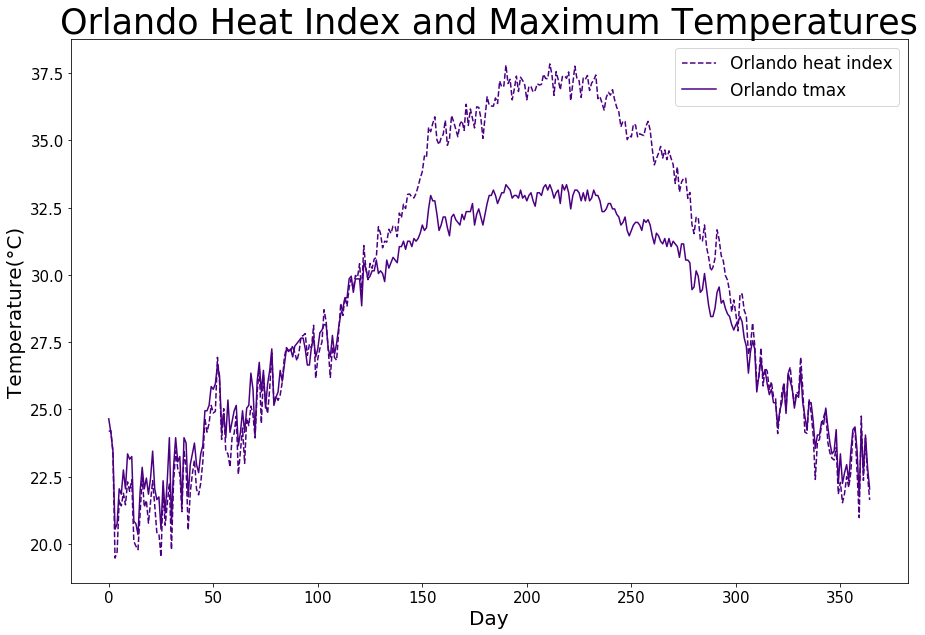

In [39]:
plt.figure(figsize=(15,10))

plt.plot(THI_tmax_orl_median,'--', color= 'indigo', label= 'Orlando heat index')
plt.plot(orltmax_median, color= 'indigo', label= 'Orlando tmax')

plt.rc('legend',fontsize=17) # using a size in points; SET DEFAULT USING RC
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.legend()
plt.xlabel('Day', size=20)
plt.ylabel('Temperature(°C)',size=20)
plt.title('Orlando Heat Index and Maximum Temperatures', size=35)
#plt.figtext(.52,.9,'Orlando Daily Heat Index and Median Maximum Temperature', fontsize=25, ha='center')
plt.savefig('thi_tmax_orl.JPEG',format='jpeg')

## Number of days where temperature was above 33°C

(Orlando) Slope:  0.281184668989547 Y-intercept:  -511.03937282229964 p-value:  0.2153488656657855


<Figure size 432x288 with 0 Axes>

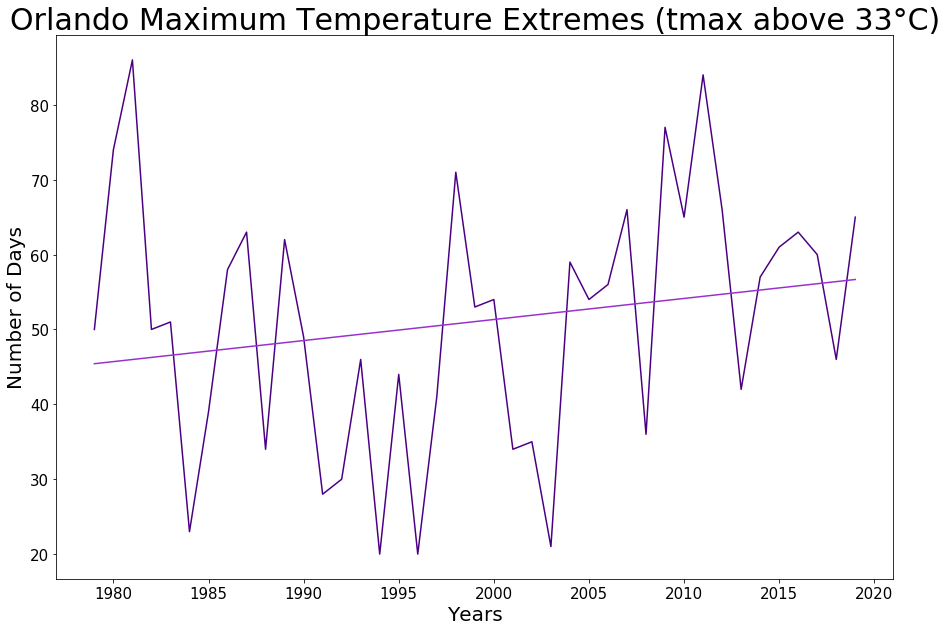

In [30]:
orl_heatdays = np.zeros((orlyrs.size))

#91/32.7, 103/39.4, 126/52.2


for i_orlyrs in enumerate(orlyrs):
     
    # Pull out current year temperatures
    curr_year = orltmax[i_orlyrs[0],:]
    
    orl_above_thresh = sum(i>=33 for i in curr_year)
    
    
    # Store value
    orl_heatdays[i_orlyrs[0]] = orl_above_thresh 

# Calculate the regression
regstat_ehd = stats.linregress(orlyrs,orl_heatdays)
reg_slope_ehd = regstat_ehd.slope      # slope of the regression line
reg_int_ehd   = regstat_ehd.intercept  # intercept of the regression line
reg_pval_ehd  = regstat_ehd.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_ehd = (orlyrs*reg_slope_ehd)+reg_int_ehd
    
plt.figure()
plt.figure(figsize=(15,10))
#plt.legend()
plt.plot(orlyrs,orl_heatdays, color='indigo', label = 'tmax')
plt.plot(orlyrs, y_pred_ehd, color = 'darkorchid')
plt.title('Orlando Maximum Temperature Extremes (tmax above 33°C)', size=30)
plt.xlabel('Years', size=20)
plt.ylabel('Number of Days', size=20)
plt.rc('legend',fontsize=17) # using a size in points; SET DEFAULT USING RC
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.savefig('abovethresh_orl.JPEG',format='jpeg')
#trend line

print('(Orlando) Slope: ',reg_slope_ehd,'Y-intercept: ', reg_int_ehd, 'p-value: ', reg_pval_ehd)

<Figure size 432x288 with 0 Axes>

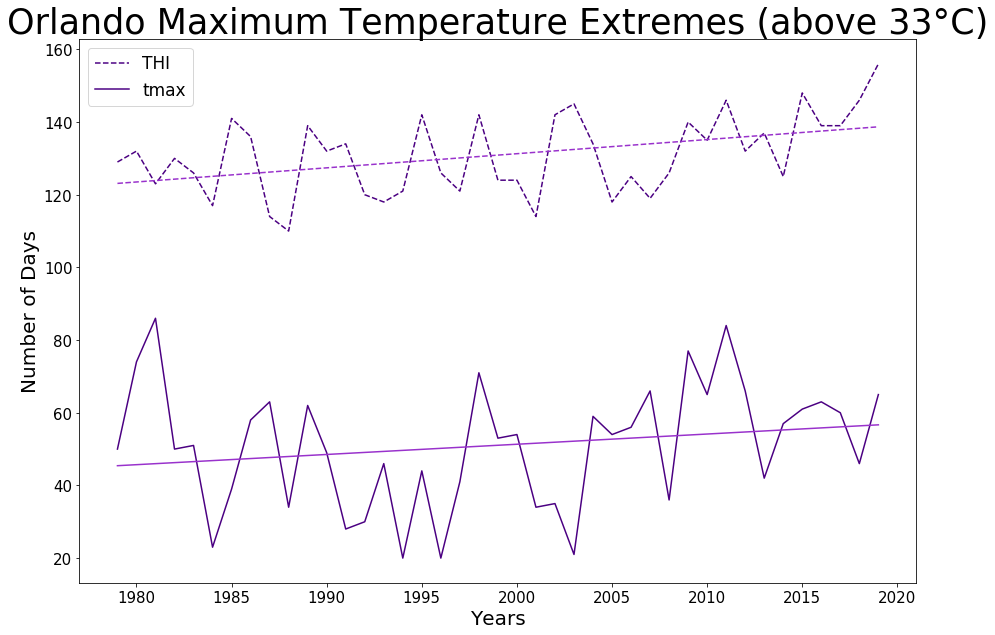

In [31]:
orl_heatdaysTHI = np.zeros((orlyrs.size))

#91/32.7, 103/39.4, 126/52.2


for i_orlyrs in enumerate(orlyrs):
     
    # Pull out current year temperatures
    curr_year = THI_tmax_orl[i_orlyrs[0],:]
    
    orl_above_thresh = sum(i>=33 for i in curr_year)
    
    
    # Store value
    orl_heatdaysTHI[i_orlyrs[0]] = orl_above_thresh 

# Calculate the regression
regstat_ehdTHI = stats.linregress(orlyrs,orl_heatdaysTHI)
reg_slope_ehdTHI = regstat_ehdTHI.slope      # slope of the regression line
reg_int_ehdTHI   = regstat_ehdTHI.intercept  # intercept of the regression line
reg_pval_ehdTHI  = regstat_ehdTHI.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_ehdTHI = (orlyrs*reg_slope_ehdTHI)+reg_int_ehdTHI
    
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(orlyrs,orl_heatdaysTHI,'--', color='indigo', label = 'THI')
plt.plot(orlyrs, y_pred_ehdTHI,'--', color = 'darkorchid')

plt.plot(orlyrs,orl_heatdays, color='indigo', label = 'tmax')
plt.plot(orlyrs, y_pred_ehd, color = 'darkorchid')

plt.title('Orlando Maximum Temperature Extremes (above 33°C)', size=35)
plt.xlabel('Years', size=20)
plt.ylabel('Number of Days', size=20)
plt.legend()


## Find where average daily maximum temperature is above 

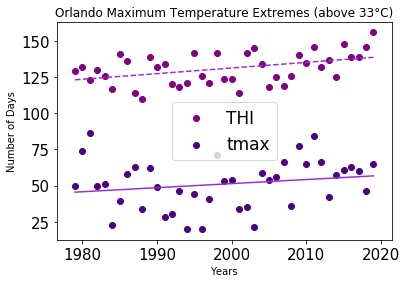

In [32]:
plt.figure()
#plt.figure(figsize=(15,10))
#plt.plot(orlyrs,orl_heatdaysTHI,'--', color='indigo', label = 'THI')
plt.scatter(orlyrs,orl_heatdaysTHI, color='purple',label='THI')
plt.plot(orlyrs, y_pred_ehdTHI,'--', color = 'darkorchid')

#plt.plot(orlyrs,orl_heatdays, color='indigo', label = 'tmax')
plt.scatter(orlyrs,orl_heatdays, color='indigo',label='tmax')
plt.plot(orlyrs, y_pred_ehd, color = 'darkorchid')

plt.title('Orlando Maximum Temperature Extremes (above 33°C)')
plt.xlabel('Years')
plt.ylabel('Number of Days')
plt.legend()

## Timing of first, last day above thresh and length of heat exposure season

## Calculate for tmax temperatures

/Users/fiker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater_equal
  # Remove the CWD from sys.path while we load stuff.


(Second day Orl) pval: 0.4646452911258382 y-intercept:  -70.10121951219514 slope: 0.16707317073170733 2019:  277.0
(First day Orl) pval: 0.18583932937469502 y-intercept:  1047.0959930313586 slope: -0.46149825783972115 2019:  146.0
(Length Orl) pval: 0.16218738188873533 y-intercept:  -1117.1972125435545 slope: 0.6285714285714288 2019:  131.0
d1 THI 2050:  101.02456445993028
d1 tmax 2050:  97.47787456445997
d2 THI 2050:  272.39878048780486
d2 tmax 2050:  326.49703832752607
len THI 2050:  171.37421602787435
len tmax 2050:  229.019163763066
                
all stats len tmax LinregressResult(slope=0.6285714285714288, intercept=-1117.1972125435545, rvalue=0.2224252661213342, pvalue=0.16218738188873533, stderr=0.44118470017653566)

all stats  LinregressResult(slope=0.6742160278745648, intercept=-1153.1236933797918, rvalue=0.23141191995273233, pvalue=0.1454535230183018, stderr=0.45386797771161164)
pval:  0.16218738188873533 slope:  0.6285714285714288


<Figure size 432x288 with 0 Axes>

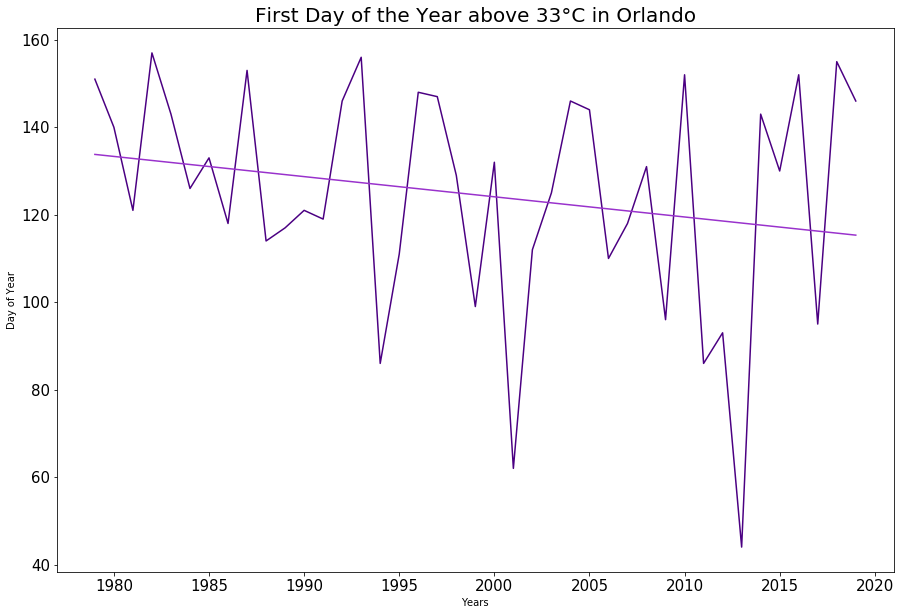

<Figure size 432x288 with 0 Axes>

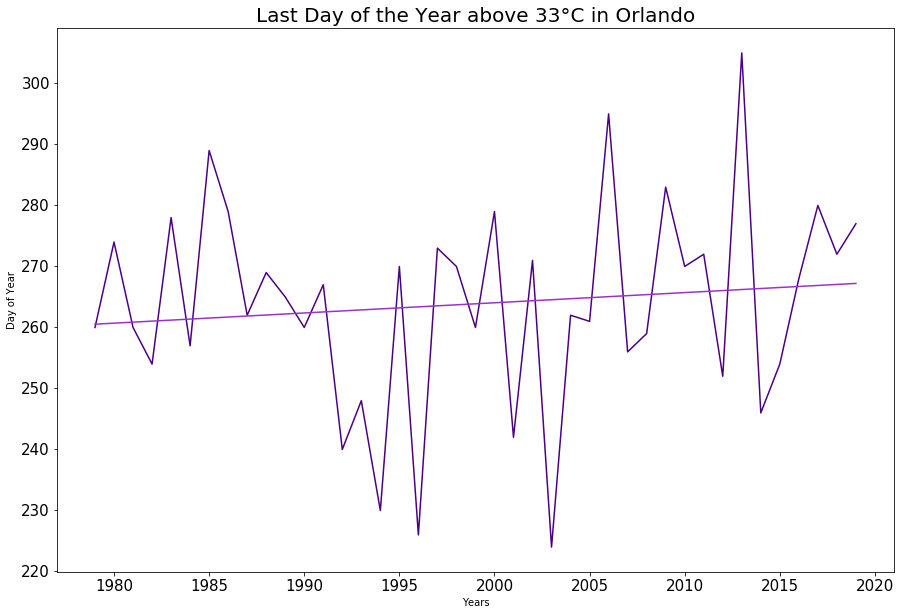

<Figure size 432x288 with 0 Axes>

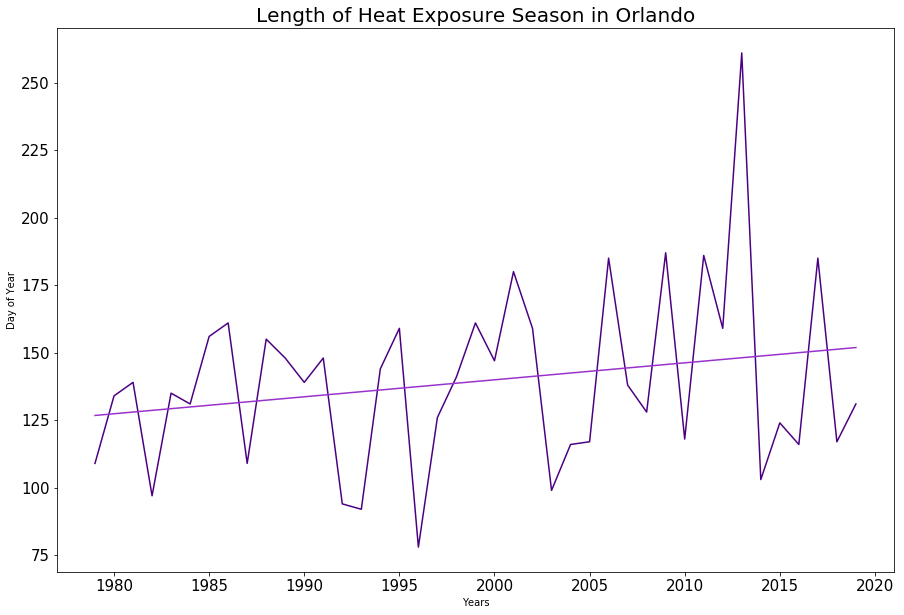

In [40]:
# Setup an array to store all the calculations
day1_t33_orl = np.zeros((orlyrs.size))   # The first day of the year with Tmax>33
day2_t33_orl = np.zeros((orlyrs.size))   # The last day of the year with Tmax>33
# Setup the Yearly Loop
for i_yr in enumerate(orlyrs):
    #print(i_yr)
    #Take out the temperatures for current year
    curr_yr_orl = orltmax[i_yr[0],:].copy()
    # Find location of ALL days with TMAX>=33
    loc_days_orl = np.where(curr_yr_orl>=33)
    # Setup a boolean in case there are no days above 33 C
    if np.size(loc_days_orl)==0:
        t33_d1 = np.nan
        t33_d2 = np.nan
    else:
        t33_d1 = np.min(loc_days_orl)+1        
        t33_d2 = np.max(loc_days_orl)+1        
    # Put it in the storage array
    day1_t33_orl[i_yr[0]] = t33_d1.copy()
    day2_t33_orl[i_yr[0]] = t33_d2.copy()

regstat_day2_t33= stats.linregress(orlyrs,day2_t33_orl)
reg_slope_d2 = regstat_day2_t33.slope      # slope of the regression line
reg_int_d2   = regstat_day2_t33.intercept  # intercept of the regression line
reg_pval_d2  = regstat_day2_t33.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_day2 = (orlyrs*reg_slope_d2)+reg_int_d2

# Calculate the regression
regstat_day1_t33= stats.linregress(orlyrs,day1_t33_orl)
reg_slope_d1 = regstat_day1_t33.slope      # slope of the regression line
reg_int_d1   = regstat_day1_t33.intercept  # intercept of the regression line
reg_pval_d1  = regstat_day1_t33.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_day1 = (orlyrs*reg_slope_d1)+reg_int_d1

length_t33 = day2_t33_orl-day1_t33_orl
# Calculate the regression
regstat_len_t33= stats.linregress(orlyrs,length_t33)
reg_slope = regstat_len_t33.slope      # slope of the regression line
reg_int   = regstat_len_t33.intercept  # intercept of the regression line
reg_pval  = regstat_len_t33.pvalue     # pvalue for significance
# Generate our model prediction
y_pred = (orlyrs*reg_slope)+reg_int

heatexp_orl = day2_t33_orl-day1_t33_orl

print('(Second day Orl) pval:', reg_pval_d2,'y-intercept: ',reg_int_d2, 'slope:', reg_slope_d2,'2019: ',day2_t33_orl[-1])
print('(First day Orl) pval:', reg_pval_d1,'y-intercept: ',reg_int_d1, 'slope:', reg_slope_d1,'2019: ',day1_t33_orl[-1])
print('(Length Orl) pval:', reg_pval,'y-intercept: ',reg_int, 'slope:', reg_slope,'2019: ',heatexp_orl[-1])


#d1 / 1st day
print('d1 THI 2050: ', 2050*reg_slope_d1+reg_int_d1)
print('d1 tmax 2050: ',2050*reg_slope_d1THI+reg_int_d1THI)

#d2 / last day
print('d2 THI 2050: ', 2050*reg_slope_d2+reg_int_d2)
print('d2 tmax 2050: ',2050*reg_slope_d2THI+reg_int_d2THI)

#heat exp season
print('len THI 2050: ', 2050*reg_slope+reg_int)
print('len tmax 2050: ',2050*reg_slopeTHI+reg_intTHI)
print('                ')
print('all stats len tmax', regstat_len_t33)
print('')


print('all stats ', regstat_len_t33THI)
#print('2019: tmax: ', heatexp_orl[-1], '2019', heatexp_orlTHI[-1])
#template
#print('THI 2050: ', 2050*)
#print('tmax 2050: ',2050*)


plt.figure()
plt.figure(figsize=(15,10))
plt.plot(orlyrs,day1_t33_orl, color='indigo')
plt.plot(orlyrs, y_pred_day1, color = 'darkorchid')
plt.title('First Day of the Year above 33°C in Orlando', size=20)
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_first_orl.JPEG',format='jpeg')

plt.figure()
plt.figure(figsize=(15,10))
plt.plot(orlyrs,day2_t33_orl, color='indigo')
plt.plot(orlyrs, y_pred_day2, color = 'darkorchid')
plt.title('Last Day of the Year above 33°C in Orlando', size=20)
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_last_orl.JPEG',format='jpeg')

plt.figure()
plt.figure(figsize=(15,10))
plt.plot(orlyrs,day2_t33_orl-day1_t33_orl, color='indigo')
plt.plot(orlyrs,y_pred,color='darkorchid')
plt.title('Length of Heat Exposure Season in Orlando', size=20)
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_heatseason_orl.JPEG',format='jpeg')


print('pval: ',reg_pval, 'slope: ',reg_slope)

## Calculate for heat indicies

THI D1 int 471.4064459930313 slope:  -0.18240418118466895 pval:  LinregressResult(slope=-0.18240418118466895, intercept=471.4064459930313, rvalue=-0.08216984290859317, pvalue=0.6095347810107207, stderr=0.35425737826997095)
d2 THI 2050:  326.49703832752607 311.0
THI int D2 -681.7172473867593 slope:  0.4918118466898953 pval:  0.02685586858641946
pval:  0.1454535230183018 slope:  0.6742160278745648


<Figure size 432x288 with 0 Axes>

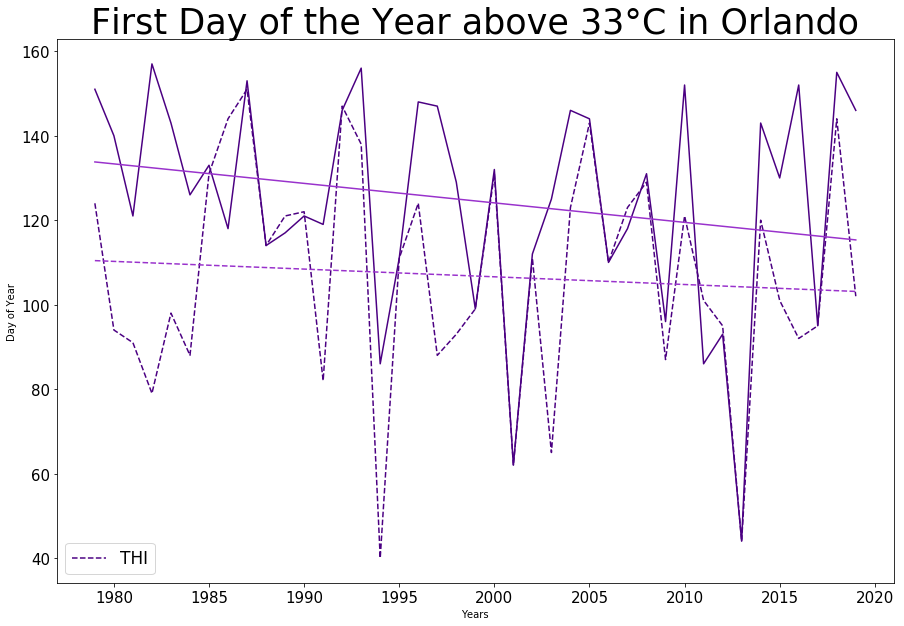

<Figure size 432x288 with 0 Axes>

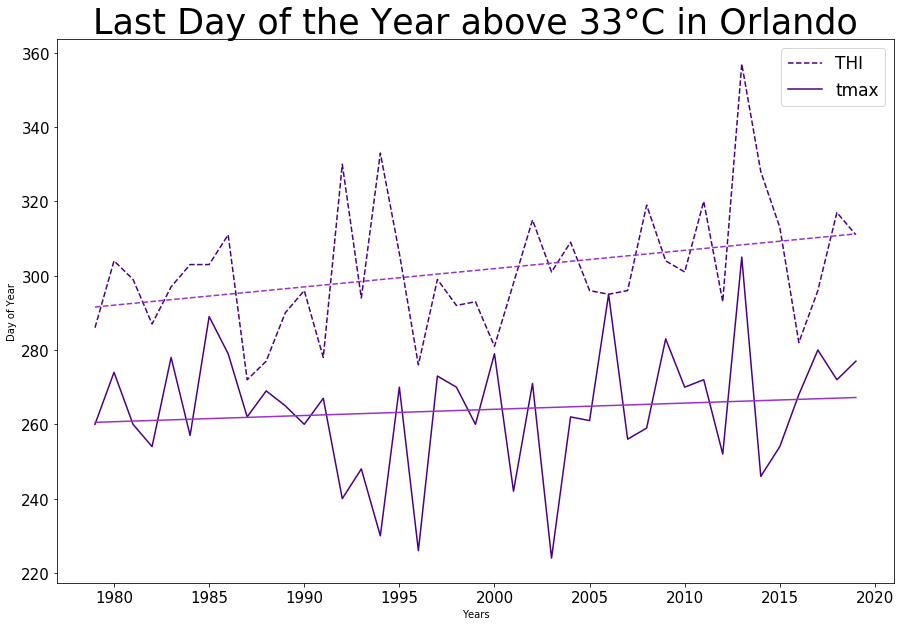

<Figure size 432x288 with 0 Axes>

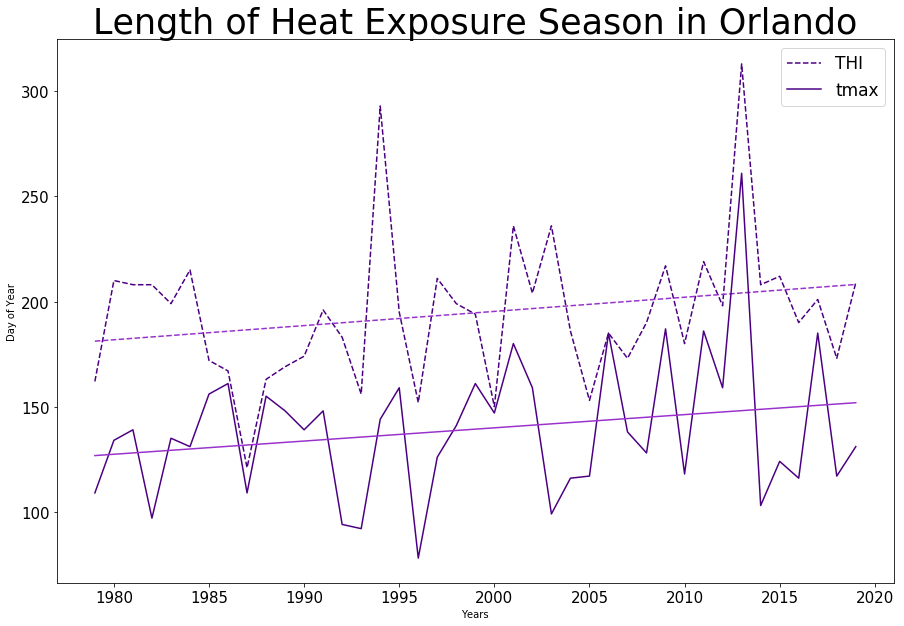

In [41]:
# Setup an array to store all the calculations
day1_t33_orlTHI = np.zeros((orlyrs.size))   # The first day of the year with Tmax>33
day2_t33_orlTHI = np.zeros((orlyrs.size))   # The last day of the year with Tmax>33
# Setup the Yearly Loop


for i_yr in enumerate(orlyrs):
    #print(i_yr)
    #Take out the temperatures for current year
    curr_yr_orl = THI_tmax_orl[i_yr[0],:]
    # Find location of ALL days with TMAX>=33
    loc_days_orl = np.where(curr_yr_orl>=33)
    # Setup a boolean in case there are no days above 33 C
    if np.size(loc_days_orl)==0:
        t33_d1_orl = np.nan
        t33_d2_orl = np.nan
    else:
        t33_d1_orl = np.min(loc_days_orl)+1        
        t33_d2_orl = np.max(loc_days_orl)+1        
    # Put it in the storage array
    day1_t33_orlTHI[i_yr[0]] = t33_d1_orl
    day2_t33_orlTHI[i_yr[0]] = t33_d2_orl

heatexp_orlTHI=day2_t33_orlTHI-day1_t33_orlTHI #heat exposure period

length_t33THI = day2_t33_orlTHI-day1_t33_orlTHI

regstat_day2_t33THI= stats.linregress(orlyrs,day2_t33_orlTHI)
reg_slope_d2THI = regstat_day2_t33THI.slope      # slope of the regression line
reg_int_d2THI   = regstat_day2_t33THI.intercept  # intercept of the regression line
reg_pval_d2THI  = regstat_day2_t33THI.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_day2THI = (orlyrs*reg_slope_d2THI)+reg_int_d2THI
print('THI D1 int',reg_int_d1THI, 'slope: ', reg_slope_d1THI, 'pval: ', reg_pval_d1THI)
print('d2 THI 2050: ', (2050*reg_slope_d2THI)+reg_int_d2THI, day2_t33_orlTHI[-1])

# Calculate the regression
regstat_day1_t33THI= stats.linregress(orlyrs,day1_t33_orlTHI)
reg_slope_d1THI = regstat_day1_t33THI.slope      # slope of the regression line
reg_int_d1THI  = regstat_day1_t33THI.intercept  # intercept of the regression line
reg_pval_d1THI  = regstat_day1_t33THI.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_day1THI = (orlyrs*reg_slope_d1THI)+reg_int_d1THI

print('THI int D2',reg_int_d2THI, 'slope: ', reg_slope_d2THI, 'pval: ', reg_pval_d2THI)


# Calculate the regression
regstat_len_t33THI = stats.linregress(orlyrs,length_t33THI)
reg_slopeTHI = regstat_len_t33THI.slope      # slope of the regression line
reg_intTHI   = regstat_len_t33THI.intercept  # intercept of the regression line
reg_pvalTHI  = regstat_len_t33THI.pvalue     # pvalue for significance
# Generate our model prediction
y_predTHI = (orlyrs*reg_slopeTHI)+reg_intTHI



plt.figure()
plt.figure(figsize=(15,10))
plt.plot(orlyrs,day1_t33_orlTHI,'--', color='indigo',label= 'THI')
plt.plot(orlyrs,day1_t33_orl, color='indigo')
plt.plot(orlyrs, y_pred_day1THI,'--', color='darkorchid')
plt.plot(orlyrs, y_pred_day1, color='darkorchid')
plt.title('First Day of the Year above 33°C in Orlando', size=35)
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.legend()
plt.savefig('timing_firstTHI_orl.JPEG',format='jpeg')


plt.figure()
plt.figure(figsize=(15,10))
plt.plot(orlyrs,day2_t33_orlTHI,'--', color='indigo',label= 'THI')
plt.plot(orlyrs,day2_t33_orl, color='indigo',label= 'tmax')
plt.plot(orlyrs, y_pred_day2THI,'--', color='darkorchid')
plt.plot(orlyrs, y_pred_day2, color='darkorchid')
plt.title('Last Day of the Year above 33°C in Orlando', size=35)
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.legend()
plt.savefig('timing_lastTHI_orl.JPEG',format='jpeg')


plt.figure()
plt.figure(figsize=(15,10))
plt.plot(orlyrs,heatexp_orlTHI,'--', color='indigo',label= 'THI')
#plt.plot(orlyrs,heatexp_orl, color='indigo',label= 'THI')
plt.plot(orlyrs, y_predTHI,'--', color='darkorchid')

plt.plot(orlyrs,heatexp_orl, color='indigo',label= 'tmax')
plt.plot(orlyrs,y_pred,color='darkorchid')

plt.title('Length of Heat Exposure Season in Orlando', size=35) #Heat index as title
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.legend()
plt.savefig('timing_heatseasonTHI_orl.JPEG',format='jpeg')


#print('pvald1: ',reg_pval_d1THI, 'slope: ',(y_pred_day2THI.slope), 'tmax', (y_pred_day2.slope)
#print('pvald2: ',reg_pval_d2THI, 'slope: ',reg_slopeTHI)


print('pval: ',reg_pvalTHI, 'slope: ',reg_slopeTHI)

# Print all calculations !!!

In [35]:

#d1 / 1st day
print('d1 THI 2050: ', 2050*reg_slope_d1+reg_int_d1)
print('d1 tmax 2050: ',2050*reg_slope_d1THI+reg_int_d1THI)

#d2 / last day
print('d2 THI 2050: ', 2050*reg_slope_d2+reg_int_d2)
print('d2 tmax 2050: ',2050*reg_slope_d2THI+reg_int_d2THI)

#heat exp season
print('len THI 2050: ', 2050*reg_slope+reg_int)
print('len tmax 2050: ',2050*reg_slopeTHI+reg_intTHI)

print('')
print('all stats len tmax', regstat_len_t33) #len tmax
print('all stats len THI', regstat_len_t33THI)
print('')
print('all stats d2 tmax', regstat_day1_t33) #d1 tmax
print('all stats d2 THI', regstat_day1_t33THI) #d1 THI
print()
print('all stats d1 tmax', regstat_day1_t33)#len tmax
print('all stats d1 THI', regstat_day1_t33THI)#len THI
print()
print('EXP 2019: tmax: ', heatexp_orl[-1],'2019 THI: ', heatexp_orlTHI[-1])
print()
print('   d1 2019: tmax: ', day1_t33_orl[-1],'2019 THI: ', day1_t33_orlTHI[-1])
print()
print('   d2 2019: tmax: ', day2_t33_orl[-1],'2019 THI: ', day2_t33_orlTHI[-1])
print()


#d1 / 1st day
print('d1 THI 2050: ', 2050*reg_slope_d1+reg_int_d1)
print('d1 tmax 2050: ',2050*reg_slope_d1THI+reg_int_d1THI)
print()
#d2 / last day
print('d2 THI 2050: ', 2050*reg_slope_d2+reg_int_d2)
print('d2 tmax 2050: ',2050*reg_slope_d2THI+reg_int_d2THI)
print()
#heat exp season
print('len THI 2050: ', 2050*reg_slope+reg_int)
print('len tmax 2050: ',2050*reg_slopeTHI+reg_intTHI)

d1 THI 2050:  101.02456445993028
d1 tmax 2050:  97.47787456445997
d2 THI 2050:  272.39878048780486
d2 tmax 2050:  326.49703832752607
len THI 2050:  171.37421602787435
len tmax 2050:  229.019163763066

all stats len tmax LinregressResult(slope=0.6285714285714288, intercept=-1117.1972125435545, rvalue=0.2224252661213342, pvalue=0.16218738188873533, stderr=0.44118470017653566)
all stats len THI LinregressResult(slope=0.6742160278745648, intercept=-1153.1236933797918, rvalue=0.23141191995273233, pvalue=0.1454535230183018, stderr=0.45386797771161164)

all stats d2 tmax LinregressResult(slope=-0.46149825783972115, intercept=1047.0959930313586, rvalue=-0.21080453367858842, pvalue=0.18583932937469502, stderr=0.34267871180787257)
all stats d2 THI LinregressResult(slope=-0.18240418118466895, intercept=471.4064459930313, rvalue=-0.08216984290859317, pvalue=0.6095347810107207, stderr=0.35425737826997095)

all stats d1 tmax LinregressResult(slope=-0.46149825783972115, intercept=1047.0959930313586, 

### find first and last day of the year above 33°C in Orlando for 2050

In [36]:
#y=mx+b
regstat_day1_t33THI= stats.linregress(orlyrs,day1_t33_orlTHI)
reg_slope_d1THI = regstat_day1_t33THI.slope      # slope of the regression line
reg_int_d1THI  = regstat_day1_t33THI.intercept  # intercept of the regression line

print('The first day of the year in 2050 (THI) is: ',reg_slope_d1THI*2050+reg_int_d1THI, 'April 7 (with .47)')
print('The first day of the year in 2050 (tmax) is: ',reg_slope_d1*2050+reg_int_d1, '')
print('')

reg_pval_d1THI = regstat_day1_t33THI
print('pval: ',reg_pvalCDD, 'slope: ',reg_slopeCDD, 'int', reg_intCDD)
print('2050: ',reg_slope_d1*2050+(reg_int_d1THI))
print('2019: ', day1_t33_orlTHI[-1])

The first day of the year in 2050 (THI) is:  97.47787456445997 April 7 (with .47)
The first day of the year in 2050 (tmax) is:  101.02456445993028 

pval:  0.021210032064600773 slope:  5.18671777003483 int -6780.33467595816
2050:  -474.66498257839703
2019:  102.0


In [37]:
reg_pval_d1 = regstat_day1_t33


## Cooling degree days

(41,)
147104.4800000001
pval:  0.021210032064600773 slope:  5.18671777003483 int -6780.33467595816
2050:  3852.4367526132382
2019:  3864.8799999999987


/Users/fiker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less_equal
  import sys


<Figure size 432x288 with 0 Axes>

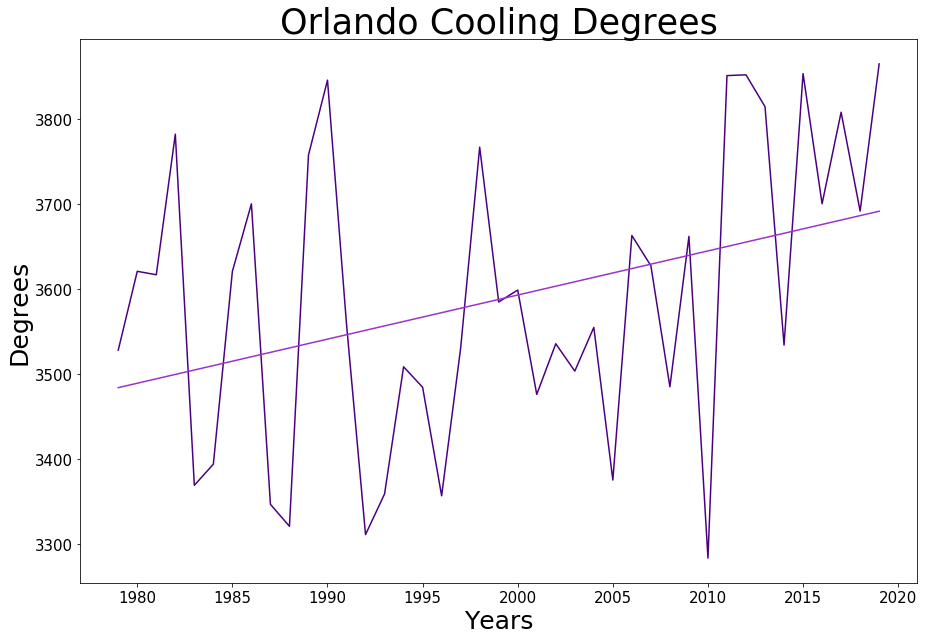

In [38]:
# Calculate the cooling degree days.
# Set the threshold for a CDD
thresh_cdd=18.33

# Convert individual days into CDD
year_cdd_orl = orltmax-thresh_cdd
i_noncdd_orl = np.where(year_cdd_orl<=0)
year_cdd_orl[i_noncdd_orl]=0

sumcdd_orl = np.nansum(year_cdd_orl, axis=1)

# Calculate the regression
regstat_CDD= stats.linregress(orlyrs,sumcdd_orl)
reg_slopeCDD = regstat_CDD.slope      # slope of the regression line
reg_intCDD   = regstat_CDD.intercept  # intercept of the regression line
reg_pvalCDD  = regstat_CDD.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_cdd = (orlyrs*reg_slopeCDD)+reg_intCDD

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Orlando Cooling Degrees', size=35)
plt.xlabel('Years', size=25)
plt.ylabel('Degrees', size=25)
plt.plot(orlyrs,sumcdd_orl, color='indigo')
plt.plot(orlyrs, y_pred_cdd, color='darkorchid')
plt.savefig('CDD_orl.JPEG',format='jpeg')

print(sumcdd_orl.shape)
# Find the location of all the cooling degree days
# Use the locations
year_cumcdd = np.sum(year_cdd_orl[i_noncdd_orl])
print(np.sum(sumcdd_orl))

print('pval: ',reg_pvalCDD, 'slope: ',reg_slopeCDD, 'int', reg_intCDD)

#y=mx+b
print('2050: ',reg_slopeCDD*2050+(-6780.334675958165))
print('2019: ', sumcdd_orl[-1])

In [20]:
#trend lines, do calc for ehd for heat index, replicate for other cities
#NUMBER of days above 33 tmax, thi, per yr